# Loading Data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [119]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [120]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [121]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

# Visualizing Data

<function matplotlib.pyplot.show(close=None, block=None)>

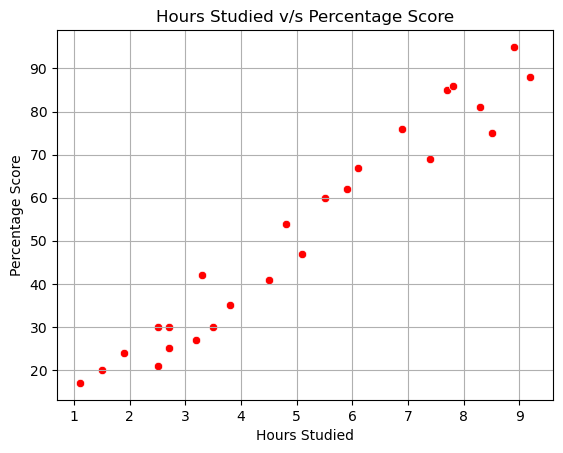

In [122]:
sns.scatterplot(data=df, x='Hours', y='Scores', color='r')
plt.grid()
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours Studied v/s Percentage Score")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

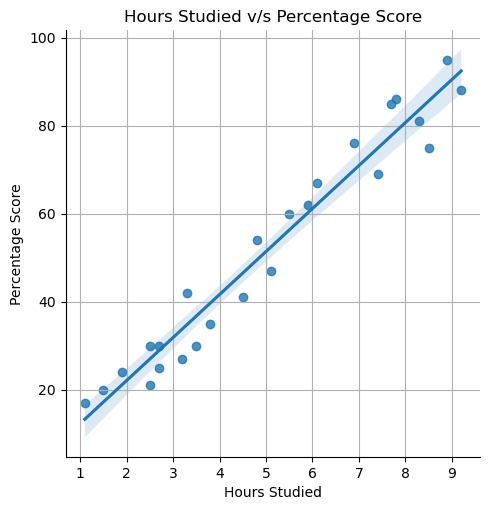

In [123]:
sns.lmplot(data=df, x='Hours', y='Scores')
plt.grid()
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours Studied v/s Percentage Score")
plt.show

# Reshaping and Train-Test Split

In [124]:
x= df['Hours']
y= df['Scores']

In [125]:
x=np.array(x)
x=x.reshape((-1,1))
y=np.array(y)
y=y.reshape(-1)

In [126]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [127]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)


# Making Predictions

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
ypred=model.predict(X_test)

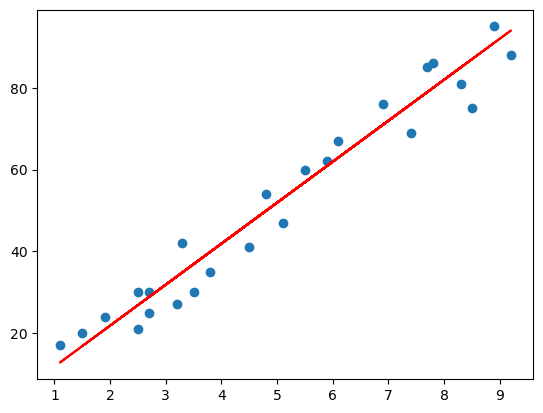

In [130]:
line= (model.coef_*x)+ model.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='r')
plt.show()

In [131]:
df2=pd.DataFrame({"Actual": y_test, "Predicted": ypred})
df2

,Actual,Predicted
0,85,78.975867
1,24,20.825687
2,30,36.867116
3,81,84.991402
4,75,86.996581


Text(0.5, 1.0, 'Hours Studied v/s Percentage Score')

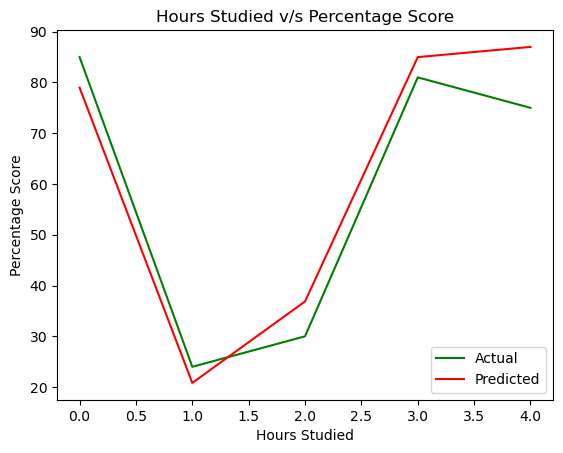

In [132]:
plt.plot(df2['Actual'], label="Actual", c='g')
plt.plot(df2['Predicted'], label="Predicted", c='r')
plt.legend()
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours Studied v/s Percentage Score")

# Problem Statement
What will be predicted score if a student studies for 9.25 hrs/ day?

In [133]:
new_hours= 9.25
new_pred= model.predict([[new_hours]])

In [134]:
print(f"Student will score: {new_pred[0]}")

Student will score: 94.51600080231943


# Evaluating Model

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE=mean_absolute_error(y_test, ypred)
MSE=mean_squared_error(y_test, ypred)
r2=r2_score(y_test, ypred)
accuracy=100*r2

In [136]:
MAE

6.410709140971173

In [137]:
MSE

50.67459518944543

In [138]:
r2

0.9272334934097567

In [139]:
accuracy

92.72334934097567